In [86]:
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plot we will create

# Read in the data

df = pd.read_csv(r"C:\Users\MAROBEST-MD\Downloads\movies.csv")

In [68]:
# Let's look at the data

df.head()

,name,rating,genre,year,released date,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980.0,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980.0,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [69]:
# Looking at the data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7668 non-null   object 
 1   rating         7591 non-null   object 
 2   genre          7668 non-null   object 
 3   year           7666 non-null   float64
 4   released date  7666 non-null   object 
 5   score          7665 non-null   float64
 6   votes          7665 non-null   float64
 7   director       7668 non-null   object 
 8   writer         7665 non-null   object 
 9   star           7667 non-null   object 
 10  country        7665 non-null   object 
 11  budget         5497 non-null   float64
 12  gross          7479 non-null   float64
 13  company        7651 non-null   object 
 14  runtime        7664 non-null   float64
dtypes: float64(6), object(9)
memory usage: 898.7+ KB


In [70]:
df.isnull().sum()

name                0
rating             77
genre               0
year                2
released date       2
score               3
votes               3
director            0
writer              3
star                1
country             3
budget           2171
gross             189
company            17
runtime             4
dtype: int64

In [30]:
pd.set_option("display.max.rows", 7668)

In [87]:
df = df.sort_values (by = ['gross'], inplace=False, ascending=False)

<function matplotlib.pyplot.show(close=None, block=None)>

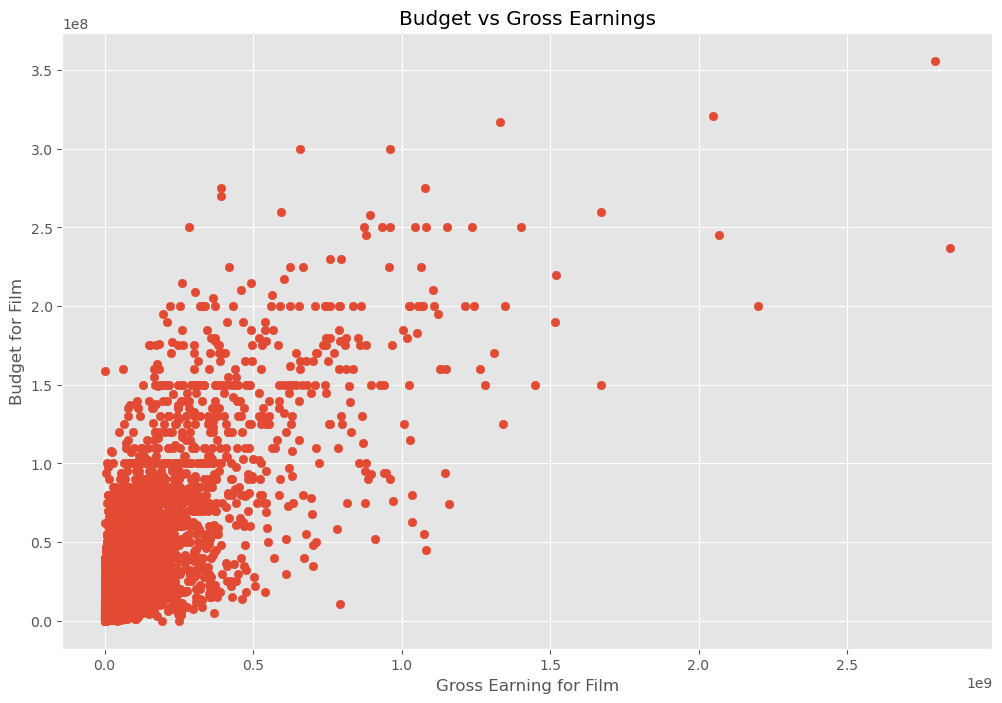

In [40]:
#scatter plot on budget vs gross

plt.scatter(x=df['gross'], y=df['budget'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earning for Film')

plt.ylabel('Budget for Film')

plt.show

<Axes: xlabel='budget', ylabel='gross'>

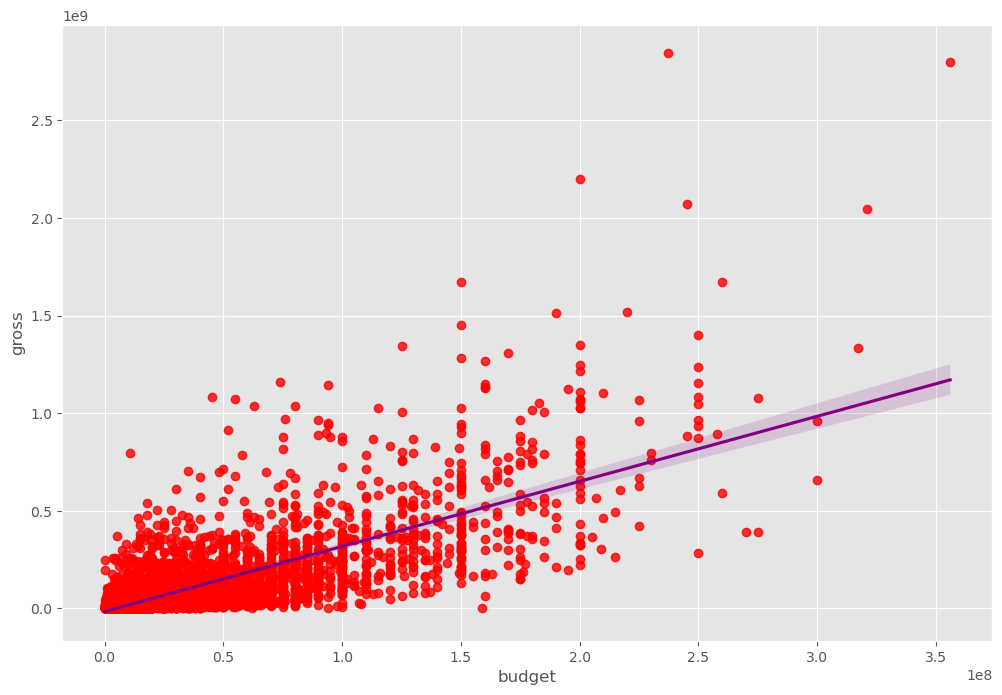

In [45]:
#scatter plot on budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"purple"})

In [52]:
# Looking at correlation

df.corr(method='pearson')

C:\Users\MAROBEST-MD\AppData\Local\Temp\ipykernel_4088\3211455406.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.105994,0.218429,0.321918,0.250514,0.120636
score,0.105994,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.218429,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.321918,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.250514,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120636,0.399451,0.309212,0.320447,0.245216,1.000000


C:\Users\MAROBEST-MD\AppData\Local\Temp\ipykernel_4088\749780344.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


<function matplotlib.pyplot.show(close=None, block=None)>

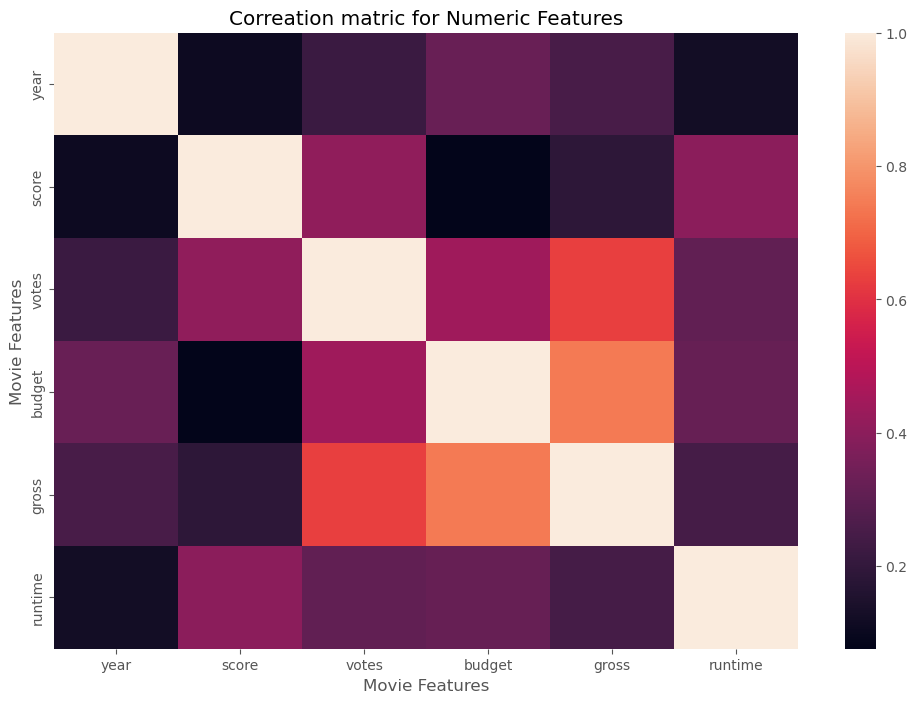

In [53]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix)

plt.title('Correation matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show


In [82]:
# Numerizing every data frame to compare all columns

numerized_df = df

for col_name in numerized_df.columns:
    if (numerized_df[col_name].dtype == 'object'):
        numerized_df[col_name] = numerized_df[col_name].astype("category")
        numerized_df[col_name] =numerized_df[col_name].cat.codes
        
numerized_df.head()


,name,rating,genre,year,released date,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009.0,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019.0,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997.0,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015.0,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018.0,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0


In [88]:
df.head()

,name,rating,genre,year,released date,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009.0,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019.0,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997.0,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015.0,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018.0,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


<function matplotlib.pyplot.show(close=None, block=None)>

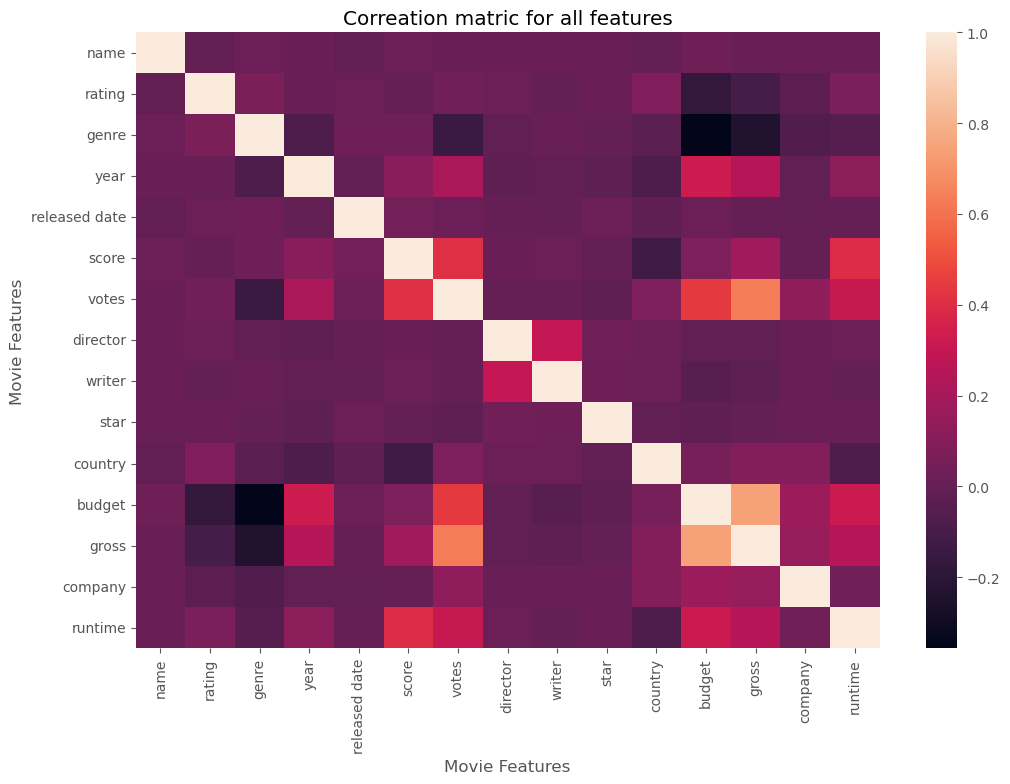

In [77]:
correlation_matrix_all = numerized_df.corr(method='pearson')

sns.heatmap(correlation_matrix_all)

plt.title('Correation matric for all features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show

In [78]:
numerized_df.corr()

,name,rating,genre,year,released date,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.010699,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.006741,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.077911,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711
year,0.010699,0.006741,-0.077911,1.000000,-0.004644,0.105994,0.218429,-0.020422,-0.008611,-0.027611,-0.080844,0.321918,0.250514,-0.015171,0.120636
released date,-0.011311,0.016613,0.029822,-0.004644,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.014683,0.001659,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.105994,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.218429,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020422,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008611,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027611,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174


In [80]:
correlation_mat = numerized_df.corr()

corr_pair = correlation_mat.unstack()

corr_pair

name           name             1.000000
               rating          -0.008069
               genre            0.016355
               year             0.010699
               released date   -0.011311
               score            0.017097
               votes            0.013088
               director         0.009079
               writer           0.009081
               star             0.006472
               country         -0.010737
               budget           0.023970
               gross            0.005533
               company          0.009211
               runtime          0.010392
rating         name            -0.008069
               rating           1.000000
               genre            0.072423
               year             0.006741
               released date    0.016613
               score           -0.001314
               votes            0.033225
               director         0.019483
               writer          -0.005921
               s

In [ ]:
# In conclusion, vote and budget have the highest correlation to gross earnings